<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/opencv-projects-and-guide/ocr-with-opencv-and-tesseract/04_correcting_text_orientation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Correcting Text Orientation with Tesseract

In [ ]:
%%shell

sudo apt install tesseract-ocr
pip install tesseract
pip install pytesseract
pip install Pillow==9.0.0

Just restart the colab environment.

In [10]:
import cv2
import pytesseract
import csv
import numpy as np


from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline

In [2]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

Let's download images.

In [ ]:
%%shell

wget https://github.com/rahiakela/computer-vision-research-and-practice/raw/main/opencv-projects-and-guide/ocr-with-opencv-and-tesseract/images/text-orient-1.png
wget https://github.com/rahiakela/computer-vision-research-and-practice/raw/main/opencv-projects-and-guide/ocr-with-opencv-and-tesseract/images/text-orient-1.png

Let's define some function.

In [3]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

In [4]:
def show_image(img_path):
  # load the input image and convert it from BGR to RGB channel ordering
  image = cv2.imread(img_path)
  plt.imshow(image)

def correct_text_orientation(img_path):
  image = cv2.imread(img_path)

  image_bgr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # determine the text orientation
  results = pytesseract.image_to_osd(image_bgr, output_type=pytesseract.Output.DICT)

  print(f"[INFO] detected orientation: {results['orientation']}")
  print(f"[INFO] rotate by {results['rotate']} degrees to correct")
  print(f"[INFO] detected script: {results['script']}")

  # rotate the image to correct the orientation
  rotated = rotate_bound(image, angle=results["rotate"])
  return rotated

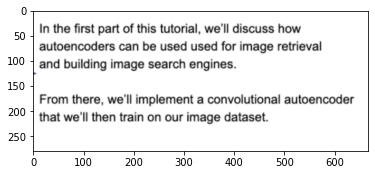

In [8]:
show_image("text-orient-1.png")

[INFO] detected orientation: 0
[INFO] rotate by 0 degrees to correct
[INFO] detected script: Latin


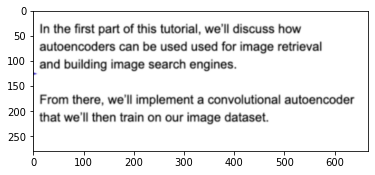

In [12]:
plt.imshow(correct_text_orientation("text-orient-1.png"))

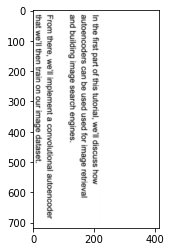

In [13]:
show_image("text-orient-2.png")

[INFO] detected orientation: 90
[INFO] rotate by 270 degrees to correct
[INFO] detected script: Latin


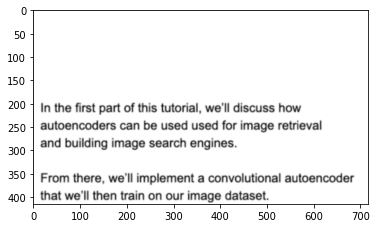

In [14]:
plt.imshow(correct_text_orientation("text-orient-2.png"))